##### To use a Support Vector Machine (SVM) for anomaly detection, start by loading and cleaning the dataset to ensure data quality. Next, select key features that are indicative of anomalies and split the dataset into training and testing portions. Applying feature scaling to normalize data dimensions is crucial for SVM performance. Train the SVM model with appropriate kernel functions and parameters. Finally, the model will be evaluated using precision, recall, and the F1-score, and its performance will be visualized with a confusion matrix. This structured approach ensures the SVM model effectively identifies anomalies, balancing detection accuracy and model reliability.

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


Precision: 0.830
Recall: 0.832
F1 Score: 0.820
              precision    recall  f1-score   support

           0       0.82      0.55      0.65      1155
           1       0.83      0.95      0.89      2792

    accuracy                           0.83      3947
   macro avg       0.83      0.75      0.77      3947
weighted avg       0.83      0.83      0.82      3947



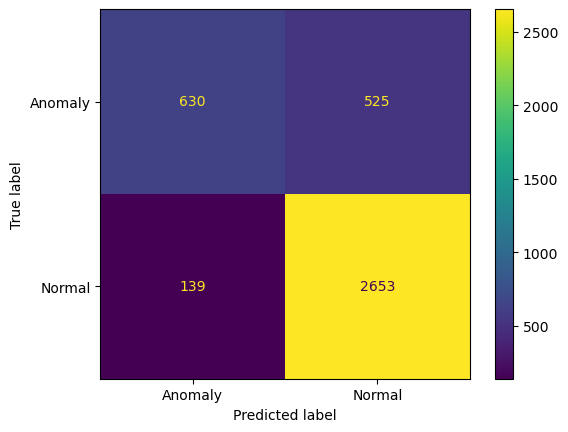

In [11]:

def anomaly_detection_svm():
    # Load the dataset
    
    
    data = pd.read_csv('energydata.csv')
    
    data = data.drop('date', axis=1)
    
    X = data.drop('Windspeed', axis=1)  # Assuming 'target' is the column name of the continuous target variable
    y_cont = data['Windspeed']
    
    #convert all the values in the columns into numeric
    for column in data.columns:
        data[column] = pd.to_numeric(data[column], errors='coerce')

    y = np.where(y_cont > 2, 1, 0)  # Define `threshold` based on the dataset
    
    # Select top k features; you might adjust k based on your dataset
    selector = SelectKBest(f_classif, k=10)
    X_selected = selector.fit_transform(X, y)
    
    data.dropna(axis=0, inplace=True)
    
    
    # Split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Use SVM and fit the model
    svm = SVC(kernel='rbf', gamma='auto', degree=3, coef0=0.0)
    svm.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = svm.predict(X_test_scaled)
    
    # Evaluate the final outcome
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print evaluation metrics
    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1 Score: {f1:.3f}')
    
    print(classification_report(y_test, y_pred))
    
    
    # Use a confusion matrix for visualization of the outcome
    
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Anomaly', 'Normal'])
    disp.plot()
    plt.show()

# Example usage

anomaly_detection_svm()